# **SMS Spam Detection**

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



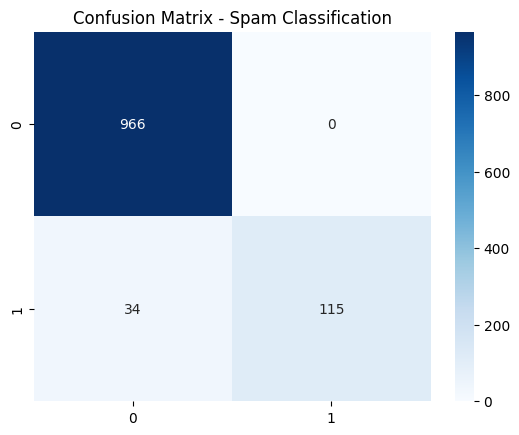

In [1]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 2. Load SMS Spam Dataset Automatically
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=["label", "message"])

# Convert labels to numerical format
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# 📌 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label"], test_size=0.2, random_state=42
)

# 📌 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 📌 5. Train Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 📌 6. Predictions & Evaluation
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 📌 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Spam Classification")
plt.show()
